# LTFS Loan Prediction

# **Mounting GoogleDrive**

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
import os
os.chdir("E:\\ML Project\\Project2\\")

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn
from sklearn.metrics import classification_report
from sklearn.ensemble.forest import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
seaborn.set(rc={'figure.figsize':(11.7,8.27)})

# **Loading Train and Test Data**

In [4]:
train=pd.read_csv("/gdrive/My Drive/Colab Notebooks/train.csv")
test=pd.read_csv('/gdrive/My Drive/Colab Notebooks/test_bqCt9Pv.csv')
train.head()


,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


# **Combining Train and Test**


In [5]:
df=train.append(test,ignore_index=True)
df.tail()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
345541,755547,44875,72509,67.58,74,16646,86,2591,14-05-92,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,NaN
345542,716994,53549,72509,78.61,74,16646,86,2593,24-04-84,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,NaN
345543,709352,55243,72509,81.37,74,16646,86,2593,1/1/1986,Self employed,...,0,0,0,0,0,0,4yrs 10mon,9yrs 5mon,0,NaN
345544,699795,55243,72509,81.37,74,16646,86,2593,1/1/1973,Self employed,...,0,0,0,0,1,1,0yrs 3mon,0yrs 3mon,0,NaN
345545,755244,40274,72509,60.68,74,16646,86,2593,1/1/1974,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,NaN


# **Checking Missing values**

In [6]:
print(df.isnull().values.any())
print(df.isnull().sum())


True
UniqueID                                    0
disbursed_amount                            0
asset_cost                                  0
ltv                                         0
branch_id                                   0
supplier_id                                 0
manufacturer_id                             0
Current_pincode_ID                          0
Date.of.Birth                               0
Employment.Type                         11104
DisbursalDate                               0
State_ID                                    0
Employee_code_ID                            0
MobileNo_Avl_Flag                           0
Aadhar_flag                                 0
PAN_flag                                    0
VoterID_flag                                0
Driving_flag                                0
Passport_flag                               0
PERFORM_CNS.SCORE                           0
PERFORM_CNS.SCORE.DESCRIPTION               0
PRI.NO.OF.ACCTS              

In [0]:
# imputing Employment.Type missing values with Self employed values
df['Employment.Type'].fillna('Self employed',inplace=True)
df['loan_default'].fillna(0,inplace=True)

# **Feature Engineering**

In [0]:
def change_col_month(col):
    year = int(col.split()[0].replace('yrs',''))
    month = int(col.split()[1].replace('mon',''))
    return year*12+month

def calculate_age(dob):
    if int(dob[-2:]) < 19:
        year = int('20' + dob[-2:])
    else:
        year = int('19' + dob[-2:])    
    return (pd.to_datetime('today').year - year)


df['age'] = df['Date.of.Birth'].apply(calculate_age)
del df['Date.of.Birth']

df['AVERAGE.ACCT.AGE'] = df['AVERAGE.ACCT.AGE'].apply(change_col_month)
df['CREDIT.HISTORY.LENGTH'] = df['CREDIT.HISTORY.LENGTH'].apply(change_col_month) 


# Creating BINS of PERFORM_CNS.SCORE.BINS and LTV

In [0]:
# CNS SCORE & LTV
df['PERFORM_CNS.SCORE.BINS']=pd.cut(df['PERFORM_CNS.SCORE'],5,labels=['Slim','Doubtful','Fair','Good','Great']).astype(np.object)
df['ltv.BINS']=pd.cut(df['ltv'],3,labels=['Low','Medium','High']).astype(np.object)


# Replacing Values of  PERFORM_CNS.SCORE.DESCRIPTION 

In [0]:
def splitting(v):
    vv=v.split("-")
    if len(vv)!=1:
        return vv[0]
    else:
        return 'Z'
df['PERFORM_CNS.SCORE.DESCRIPTION.SPLITTING']=df['PERFORM_CNS.SCORE.DESCRIPTION'].apply(splitting).astype(np.object)
df['PERFORM_CNS.SCORE.DESCRIPTION'].replace({'C-Very Low Risk':'Very Low Risk','A-Very Low Risk':'Very Low Risk','D-Very Low Risk':'Very Low Risk','B-Very Low Risk':'Very Low Risk',
'M-Very High Risk':'Very High Risk','L-Very High Risk':'Very High Risk',
                                               'F-Low Risk':'Low Risk','E-Low Risk':'Low Risk',
                                               'H-Medium Risk':'Medium Risk','I-Medium Risk':'Medium Risk',
                                               'J-High Risk':'High Risk','K-High Risk':'High Risk'},inplace=True)
df['Not_Scored']=np.where(df['PERFORM_CNS.SCORE.DESCRIPTION'].str.contains('Not Scored'),1,0)
df['Very_Low']=np.where(df['PERFORM_CNS.SCORE.DESCRIPTION'].str.contains('Very Low'),1,0)
df['Very_High']=np.where(df['PERFORM_CNS.SCORE.DESCRIPTION'].str.contains('Very High'),1,0)
df['No_History']=np.where(df['PERFORM_CNS.SCORE.DESCRIPTION'].str.contains('No Bureau'),1,0)


# Generating New Features.

In [0]:
df['ACTIVE.ACCTS']=df['PRI.ACTIVE.ACCTS']+df['SEC.ACTIVE.ACCTS']
df['CURRENT.BALANCE']=df['PRI.CURRENT.BALANCE']+df['SEC.CURRENT.BALANCE']
df['DISBURSED.AMOUNT']=df['PRI.DISBURSED.AMOUNT']+df['SEC.DISBURSED.AMOUNT']
df['NO.OF.ACCTS']=df['SEC.NO.OF.ACCTS']+df['PRI.NO.OF.ACCTS']
df['SANCTIONED.AMOUNT']=df['PRI.SANCTIONED.AMOUNT']+df['SEC.SANCTIONED.AMOUNT']
df['INSTAL.AMT']=df['PRIMARY.INSTAL.AMT']+df['SEC.INSTAL.AMT']
df['SANCTION_DISBURSED']=df['SANCTIONED.AMOUNT']-df['DISBURSED.AMOUNT']
#df= pd.get_dummies(df,columns=['Employment.Type'],drop_first=True)


# **Visualization**

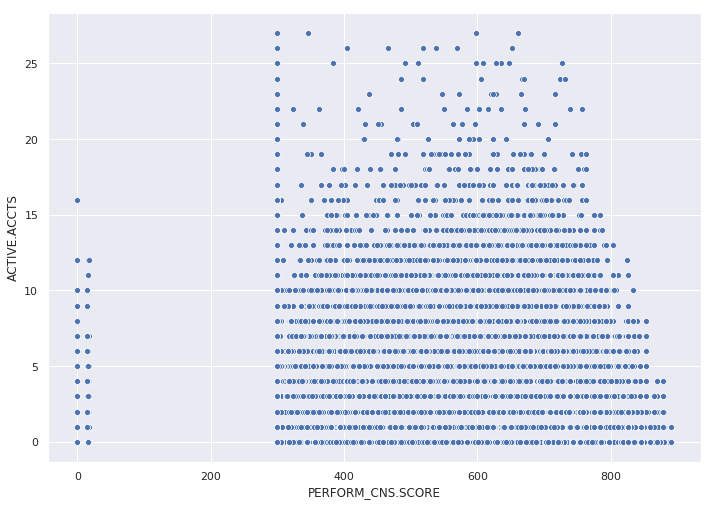

In [12]:
df = df[df['ACTIVE.ACCTS']<28]
seaborn.scatterplot(x=df['PERFORM_CNS.SCORE'],y=df['ACTIVE.ACCTS']) 

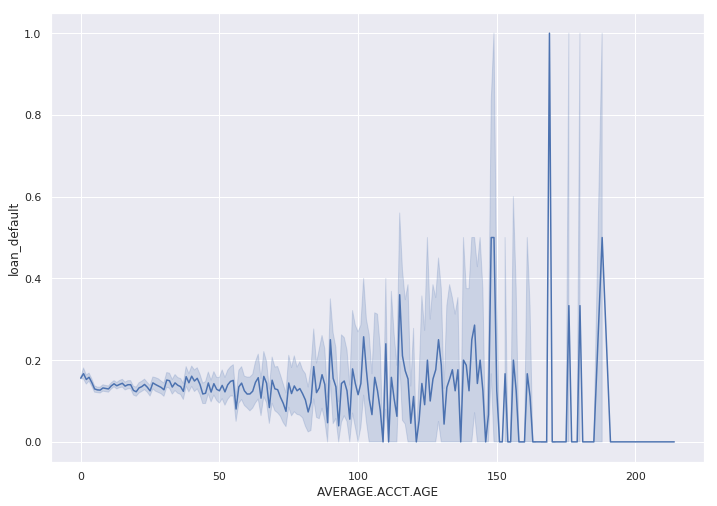

In [13]:
df = df[df['AVERAGE.ACCT.AGE']<225]
seaborn.lineplot(x=df['AVERAGE.ACCT.AGE'],y=df['loan_default'])

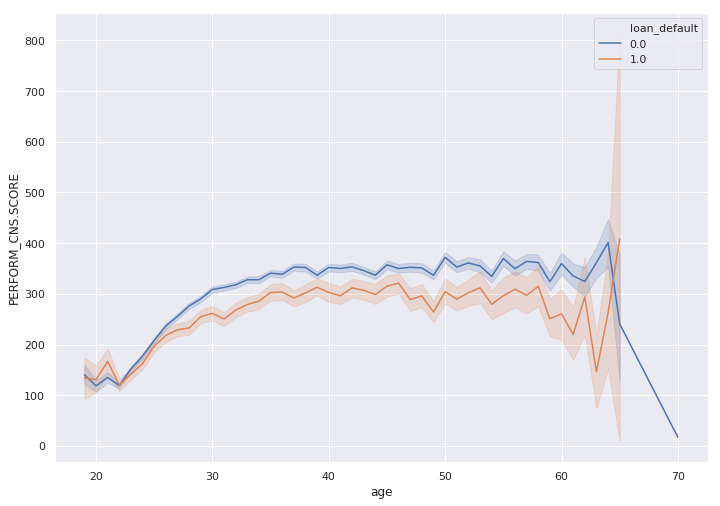

In [14]:
seaborn.lineplot(x=df['age'],y=df['PERFORM_CNS.SCORE'],hue=df['loan_default'])

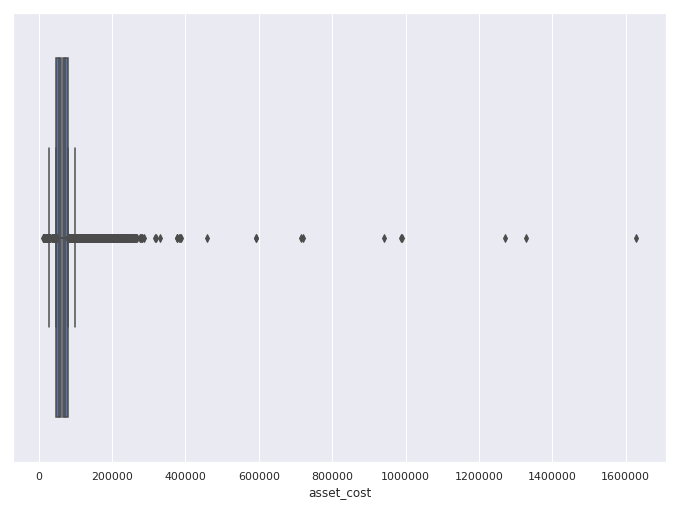

In [15]:
#boxplot
seaborn.boxplot(x=df["disbursed_amount"])
seaborn.boxplot(x=df["asset_cost"])

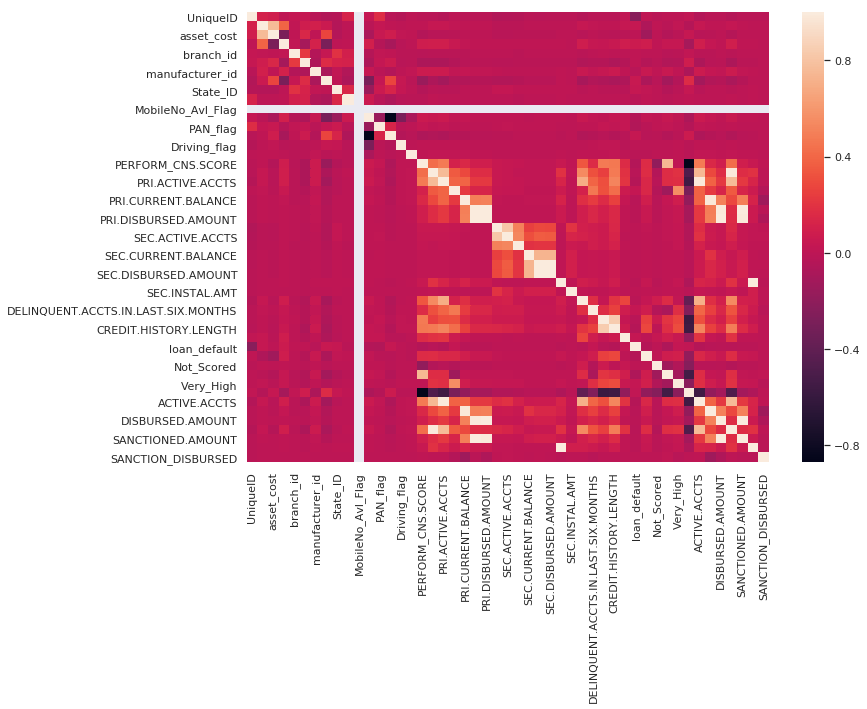

In [16]:
#correlation
corr=round(df.corr(),2)
seaborn.heatmap(corr,annot=False)

# Dropping irrelevant columns

In [0]:
##
df.drop(['DisbursalDate','UniqueID','MobileNo_Avl_Flag','Current_pincode_ID','Driving_flag','Employee_code_ID','NO.OF_INQUIRIES','State_ID','VoterID_flag','branch_id','manufacturer_id','supplier_id'],axis=1,inplace=True)
#df.drop([''],axis=1,inplace=True)

In [18]:
dftrain=df[df['loan_default'].isnull()!=True]
dftest=df[df['loan_default'].isnull()==True]
dftrain.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345507 entries, 0 to 345545
Data columns (total 43 columns):
disbursed_amount                           345507 non-null int64
asset_cost                                 345507 non-null int64
ltv                                        345507 non-null float64
Employment.Type                            345507 non-null object
Aadhar_flag                                345507 non-null int64
PAN_flag                                   345507 non-null int64
Passport_flag                              345507 non-null int64
PERFORM_CNS.SCORE                          345507 non-null int64
PERFORM_CNS.SCORE.DESCRIPTION              345507 non-null object
PRI.NO.OF.ACCTS                            345507 non-null int64
PRI.ACTIVE.ACCTS                           345507 non-null int64
PRI.OVERDUE.ACCTS                          345507 non-null int64
PRI.CURRENT.BALANCE                        345507 non-null int64
PRI.SANCTIONED.AMOUNT                   

# Train Test Split

In [0]:
X,y=dftrain.drop('loan_default',axis=1),dftrain['loan_default']
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.3,random_state = 10)

In [0]:
#categorical features
categorical_features_indices = np.where(X_train.dtypes =='object')[0]
categorical_features_indices


array([ 3,  8, 28, 29, 30], dtype=int64)

# Installing CatBoost

1. CatBoost is a machine learning algorithm that uses gradient boosting on decision trees.
2. CatBoost converts categorical values into numbers using various statistics on combinations of categorical features and combinations of categorical and numerical features. 
3.  It reduces the need for extensive hyper-parameter tuning and lower the chances of overfitting.
4. Traing time and prediction time is much faster than Random forest and XGBoost.

In [0]:
pip install catboost

In [0]:
from catboost import CatBoostClassifier

In [0]:
m=CatBoostClassifier(n_estimators=1000,random_state=10,eval_metric='AUC',max_depth=6,od_wait=50
                     ,l2_leaf_reg=5,cat_features=categorical_features_indices,random_strength=100,
                     use_best_model=True)
m.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_val, y_val)], early_stopping_rounds=100,verbose=100)
p2=m.predict(X_val)
p2
print(classification_report(y_val,p2))
roc_auc_score(y_val,p2)

0:	test: 0.5470096	test1: 0.5487652	best: 0.5487652 (0)	total: 829ms	remaining: 13m 48s
100:	test: 0.5989997	test1: 0.5992747	best: 0.5994223 (99)	total: 37.8s	remaining: 5m 36s
200:	test: 0.6054404	test1: 0.6048789	best: 0.6048789 (200)	total: 1m 15s	remaining: 5m 1s
300:	test: 0.6095741	test1: 0.6091897	best: 0.6091897 (300)	total: 1m 54s	remaining: 4m 25s
400:	test: 0.6131958	test1: 0.6124345	best: 0.6124491 (399)	total: 2m 32s	remaining: 3m 47s
500:	test: 0.6236602	test1: 0.6225174	best: 0.6225174 (500)	total: 3m 11s	remaining: 3m 10s
600:	test: 0.6388788	test1: 0.6358761	best: 0.6358761 (600)	total: 3m 54s	remaining: 2m 35s
700:	test: 0.6455169	test1: 0.6396749	best: 0.6396749 (700)	total: 4m 39s	remaining: 1m 59s
800:	test: 0.6496511	test1: 0.6413600	best: 0.6413604 (799)	total: 5m 23s	remaining: 1m 20s
900:	test: 0.6528074	test1: 0.6423532	best: 0.6423553 (897)	total: 6m 8s	remaining: 40.5s
999:	test: 0.6556833	test1: 0.6432218	best: 0.6432218 (999)	total: 6m 52s	remaining: 0us


0.5000879111259563

# 5 fold cross validation

In [0]:
err=[]
y_pred_total=[]
from sklearn.model_selection import KFold,StratifiedKFold
fold=StratifiedKFold(n_splits=5,shuffle=True,random_state=100)
i=1
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    m=CatBoostClassifier(n_estimators=1000,random_state=100,eval_metric='AUC',max_depth=6,od_wait=50
                     ,l2_leaf_reg=10,cat_features=categorical_features_indices,random_strength=100,
                     use_best_model=True)
    m.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=100,verbose=100)
    preds=m.predict_proba(X_test)[:,-1]
    print("err: ",roc_auc_score(y_test,preds))
    err.append(roc_auc_score(y_test,preds))
    p = m.predict_proba(dftest)[:,-1]
    y_pred_total.append(p)

0:	test: 0.5158823	test1: 0.5175297	best: 0.5175297 (0)	total: 464ms	remaining: 7m 43s
100:	test: 0.6160149	test1: 0.6136910	best: 0.6137496 (97)	total: 55.6s	remaining: 8m 14s
200:	test: 0.6193491	test1: 0.6165620	best: 0.6166609 (188)	total: 1m 50s	remaining: 7m 19s
300:	test: 0.6220742	test1: 0.6195408	best: 0.6195452 (298)	total: 2m 46s	remaining: 6m 26s
400:	test: 0.6244438	test1: 0.6219612	best: 0.6219852 (390)	total: 3m 41s	remaining: 5m 30s
500:	test: 0.6283745	test1: 0.6264057	best: 0.6264057 (500)	total: 4m 36s	remaining: 4m 35s
600:	test: 0.6392991	test1: 0.6363489	best: 0.6363489 (600)	total: 5m 43s	remaining: 3m 47s
700:	test: 0.6452806	test1: 0.6399801	best: 0.6399845 (699)	total: 6m 49s	remaining: 2m 54s
800:	test: 0.6495489	test1: 0.6419429	best: 0.6419429 (800)	total: 7m 55s	remaining: 1m 58s
900:	test: 0.6527972	test1: 0.6429595	best: 0.6429595 (900)	total: 9m 1s	remaining: 59.5s
999:	test: 0.6556392	test1: 0.6435544	best: 0.6435544 (999)	total: 10m 6s	remaining: 0us


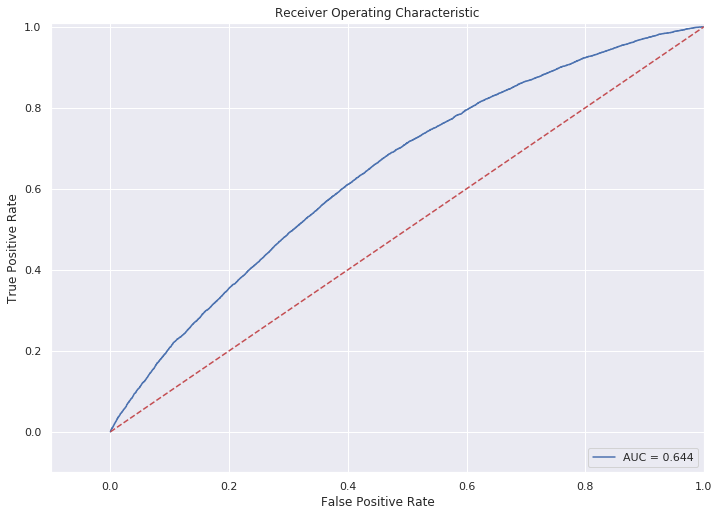

In [0]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test,preds)
roc_auc = auc(fpr,tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#**Random Forest**
------

In [0]:
X,y=dftrain.drop('loan_default',axis=1),dftrain['loan_default']
X = pd.get_dummies(data=X,columns=['Employment.Type','PERFORM_CNS.SCORE.DESCRIPTION','PERFORM_CNS.SCORE.DESCRIPTION.SPLITTING','ltv.BINS','PERFORM_CNS.SCORE.BINS'],drop_first=True)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.3,random_state = 10)

In [20]:
from imblearn.over_sampling import SMOTE
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=10)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 35486
Before OverSampling, counts of label '0': 206368 

After OverSampling, the shape of train_X: (412736, 68)
After OverSampling, the shape of train_y: (412736,) 

After OverSampling, counts of label '1': 206368
After OverSampling, counts of label '0': 206368


In [21]:
Rf = BalancedRandomForestClassifier(max_depth=4,verbose=True,random_state=10)
Rf.fit(X_train_res, y_train_res.ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.0min finished


BalancedRandomForestClassifier(bootstrap=True, class_weight=None,
                criterion='gini', max_depth=4, max_features='auto',
                max_leaf_nodes=None, min_impurity_decrease=0.0,
                min_samples_leaf=2, min_samples_split=2,
                min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                oob_score=False, random_state=10, replacement=False,
                sampling_strategy='auto', verbose=True, warm_start=False)

In [22]:
y_pred = Rf.predict(X_val)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


In [23]:
print(classification_report(y_val,y_pred))
print('Random Forest AUC ROC Score: {}'.format(roc_auc_score(y_val,y_pred)))

              precision    recall  f1-score   support

         0.0       0.87      0.71      0.78     88533
         1.0       0.18      0.37      0.24     15120

   micro avg       0.66      0.66      0.66    103653
   macro avg       0.52      0.54      0.51    103653
weighted avg       0.77      0.66      0.70    103653

Random Forest AUC ROC Score: 0.5409414528238864


#**XGBClassifier**
-------

In [24]:
xgb1 = XGBClassifier()
xgb1.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [0]:
y_pred = xgb1.predict(X_val)

In [26]:
print("ROC AUC Score: {}".format(roc_auc_score(y_val,y_pred)))

ROC AUC Score: 0.5


# Best ROC Score

In [0]:
print("err: ",roc_auc_score(y_test,preds))

err:  0.6441732288778772


# End